## **Pressure Diffusivity with PDE Method**
### *Author: Group B2 Numerical Method*

### **Read This First !!**
- Jupyter Notebook ini dibuat untuk memenuhi tugas akhir mata kuliah Numerical Method
- Jupyter Notebook ini berisikan penyelesaian soal Pressure Diffusivity dengan metode (Parsial Diferential Equation) PDE
- Penyelesaian soal ini menggunakan bahasa pemrograman Python
- Sebelum menjalankan program, pastikan anda sudah menginstall beberapa library yang dibutuhkan seperti numpy, matplotlib, dan pandas
- User tidak disarankan untuk mengubah apapun pada program ini, kecuali user ingin mengubah nilai dari variabel yang sudah ditentukan
- User dapat mengubah nilai dari variabel yang sudah ditentukan sesuai dengan kebutuhan
- User dapat mengubah nilai dari variabel dengan cara menjalankan program pada bagian "Input Parameter"
- Setelah program dijalankan, user akan mendapatkan output berupa grafik dan tabel yang berisikan nilai dari variabel yang sudah ditentukan

### **Input Parameter**
Pada bagian ini, user diminta untuk menginput nilai dari variabel yang sudah ditentukan. Variabel yang diminta adalah:
* **Porosity** = merupakan persentase volume total batuan yang terdiri dari ruang pori atau terbuka (fraction)
* **Permeability** =  merupakan kemampuan batuan untuk membiarkan fluida mengalir (mD)
* **Viscosity** = merupakan ukuran kekentalan dari fluida (cP)
* **Compressibility** = merupakan kemampuan material untuk mengalami perubahan volume ketika diberi tekanan (1/psi)
* **Length (r)** = merupakan panjang sampel batuan (ft)
* **n (i)** = jumlah section yang terbagi pada sampel batuan
* **dr** = jarak antar section pada sampe batuan (ft)
* **dt** = jarak waktu antar time step (hour)
* **Pressure Injeksi** = merupakan tekanan fluida yang diinjeksikan (psi)
* **Pressure Initial** = merupakan tekanan awal fluida pada reservoir (psi)
* **Pressure Production** = merupakan tekanan fluida yang diinginkan pada saar produksi (psi)

### **Output**
Pada bagian ini, user akan mendapatkan output berupa grafik dan tabel yang berisikan nilai dari variabel yang sudah ditentukan. Variabel yang akan ditampilkan adalah:
* **Pressure** = merupakan tekanan fluida pada reservoir (psi), pada setiap section dan time step
 

# Input Library

In [ ]:
# Input Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input Parameters

In [4]:
# Input parameters
porosity = input("Porosity: ")
viscosity = input("Viscosity: ")
Ct = input("Ct: ")
permeability = input("Permeability: ")
length = input("Length (r): ")
num_section = input("Number of sections: ")
num_time_steps = input("Number of time steps: ")
dt = input("dt: ")
#------------------------------------------------------------------------------------------

# Convert to float
porosity = (float(porosity))
viscosity = float(viscosity)
Ct = float(Ct)
permeability = float(permeability)
length = float(length)
num_sections = int(num_section)
num_time_steps = int(num_time_steps)
dr = (length/num_sections)
dt = int(dt)
#------------------------------------------------------------------------------------------

table_index_name = ['Porosity', 'Viscosity', 'Ct', 'Permeability', 'Length (r)', 'n (Sections)', 'dr', 'dt']
table_data = {'Reservoir Properties': [porosity, viscosity, Ct, permeability, length, num_sections, dr, dt],
            'Dimension': ['Friction', 'cP', 'psi^-1', 'mD', 'ft', 'sections', 'ft', 'hours']}

table_parameter = pd.DataFrame(table_data, index=table_index_name)
table_parameter

,Reservoir Properties,Dimension
Porosity,0.150000,Friction
Viscosity,0.600000,cP
Ct,0.000003,psi^-1
Permeability,5.000000,mD
Length (r),1000.000000,ft
n (Sections),10.000000,sections
dr,100.000000,ft
dt,1.000000,hours


## Initial Conditions

In [5]:
# Input parameters
P_initial = input("Initial pressure: ")
P_injeksi = input("Injection well pressure: ")
P_production = input("Production well pressure: ")

P_initial = float(P_initial)
P_injeksi = float(P_injeksi)
P_production = float(P_production)
#------------------------------------------------------------------------------------------

index_condition = ['Initial pressure', 'Injection well pressure', 'Production well pressure']
data_condition = {'Condition': [P_initial, P_injeksi, P_production],
                'Dimension': ['psi', 'psi', 'psi']}
table_condition = pd.DataFrame(data_condition, index=index_condition)
table_condition

,Condition,Dimension
Initial pressure,4000.0,psi
Injection well pressure,570.0,psi
Production well pressure,3000.0,psi


# Lambda Equation

$$
\lambda = \frac{{\text{{porosity}} \times \text{{viscosity}} \times \text{{Ct}}}}{{0.000264 \times \text{{permeability}}}}
$$


In [6]:
# Lamda Calculation
def lamda(porosity, viscosity, Ct, permeability):
    lamda = ((porosity * viscosity * Ct) / (0.000264 * permeability))
    return lamda

print('Nilai Lambda: ', lamda(porosity, viscosity, Ct, permeability))

Nilai Lambda:  0.00020454545454545454


# Pressure Diffusivity Equation

$$
P_{i}^{(l+1)} = \frac{\Delta t}{\lambda} \left( \frac{P_{i+1}^{l} - 2P_{i}^{l} + P_{i-1}^{l}}{\Delta r^2} + \frac{1}{r} \left( P_{i+1}^{l} - P_{i-1}^{l} \right) \right) + P_{i}^{l}
$$

## Iteration Conditions

In [7]:
index_condition = ['Time Step (l)', 'Number of Sections']
data_condition = {'Condition': [num_time_steps, num_sections,],
                'Dimension': ['Hour', 'Sections']}
iteration_condition = pd.DataFrame(data_condition, index=index_condition)
iteration_condition

,Condition,Dimension
Time Step (l),100,Hour
Number of Sections,10,Sections


## Make Matrix for Pressure Distribution

In [8]:
# Make Matrix for Pressure Distribution
Pressure = np.zeros((num_time_steps+1, num_sections+1))
Pressure

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Define Boundary Conditions

In [9]:
# Define Initial Condition
Pressure[0] = P_initial
Pressure[:, 0] = P_injeksi
Pressure[:, -1] = P_production

## Pressure Distribution using PDE Explicit Method

In [10]:
def PressureDiffusivity(num_time_steps, num_sections):
    for i in range (0, num_time_steps+1):
        for j in range (1, num_sections):
            if i == 0:
                Pressure[i, j] = P_initial
            else:
                Pressure[i, j] = round((dt/(lamda(porosity, viscosity, Ct, permeability))) * (((Pressure[i-1][j+1] - (2 * Pressure[i-1][j]) + Pressure[i-1][j-1]) / (dr**2)) + ((1 / length) * ((Pressure[i-1][j+1] - Pressure[i-1][j-1]) / (2 * dr)))) + Pressure[i-1][j])
    return Pressure
        # print('Time Step: ', i, ': ', Pressure[i])   

PressureDiffusivity(num_time_steps, num_sections)

array([[ 570., 4000., 4000., ..., 4000., 4000., 3000.],
       [ 570., 2407., 4000., ..., 4000., 3487., 3000.],
       [ 570., 2372., 3260., ..., 3737., 3475., 3000.],
       ...,
       [ 570.,  943., 1280., ..., 2696., 2856., 3000.],
       [ 570.,  943., 1280., ..., 2696., 2856., 3000.],
       [ 570.,  943., 1279., ..., 2695., 2856., 3000.]])

In [11]:
print(PressureDiffusivity(num_time_steps, num_sections))

[[ 570. 4000. 4000. ... 4000. 4000. 3000.]
 [ 570. 2407. 4000. ... 4000. 3487. 3000.]
 [ 570. 2372. 3260. ... 3737. 3475. 3000.]
 ...
 [ 570.  943. 1280. ... 2696. 2856. 3000.]
 [ 570.  943. 1280. ... 2696. 2856. 3000.]
 [ 570.  943. 1279. ... 2695. 2856. 3000.]]


In [12]:
Pressure = PressureDiffusivity(num_time_steps, num_sections)
Pressure

array([[ 570., 4000., 4000., ..., 4000., 4000., 3000.],
       [ 570., 2407., 4000., ..., 4000., 3487., 3000.],
       [ 570., 2372., 3260., ..., 3737., 3475., 3000.],
       ...,
       [ 570.,  943., 1280., ..., 2696., 2856., 3000.],
       [ 570.,  943., 1280., ..., 2696., 2856., 3000.],
       [ 570.,  943., 1279., ..., 2695., 2856., 3000.]])

In [13]:
Result = PressureDiffusivity(num_time_steps, num_sections)

In [14]:
Result = pd.DataFrame(Result)
Result

,0,1,2,3,4,5,6,7,8,9,10
0,570.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,3000.0
1,570.0,2407.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,3487.0,3000.0
2,570.0,2372.0,3260.0,4000.0,4000.0,4000.0,4000.0,4000.0,3737.0,3475.0,3000.0
3,570.0,1991.0,3227.0,3656.0,4000.0,4000.0,4000.0,3865.0,3725.0,3353.0,3000.0
4,570.0,1966.0,2873.0,3633.0,3840.0,4000.0,3931.0,3856.0,3599.0,3345.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...
96,570.0,944.0,1281.0,1585.0,1859.0,2104.0,2323.0,2520.0,2697.0,2857.0,3000.0
97,570.0,943.0,1281.0,1584.0,1858.0,2103.0,2322.0,2519.0,2697.0,2856.0,3000.0
98,570.0,943.0,1280.0,1584.0,1857.0,2102.0,2321.0,2519.0,2696.0,2856.0,3000.0
99,570.0,943.0,1280.0,1583.0,1856.0,2101.0,2321.0,2518.0,2696.0,2856.0,3000.0


# Visualize Pressure Distribution

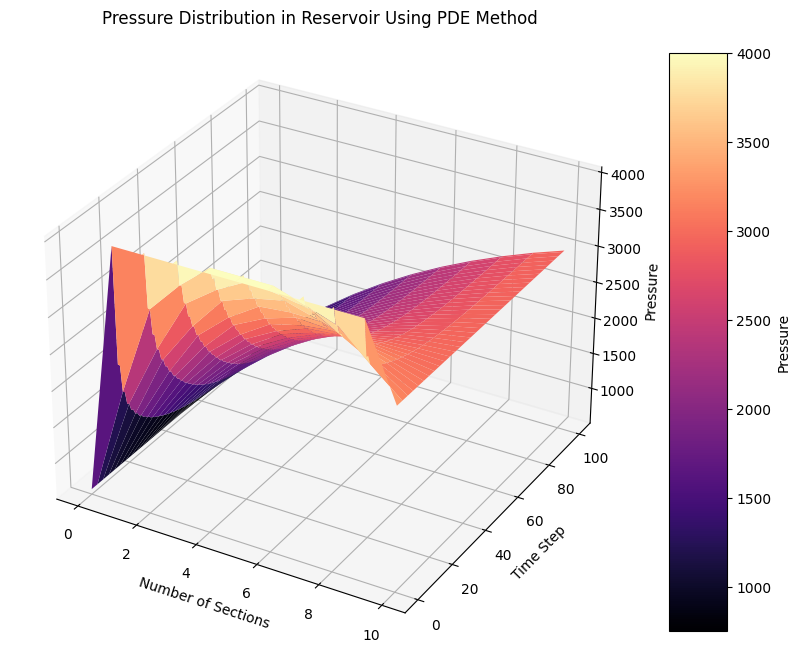

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D array for demonstration purposes
# Replace this with your actual data
data = Result

# Create mesh grid for the 3D array
x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))

# Plot using mesh grid in 3D
fig= plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, data, cmap='magma')

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Pressure')

# Customize the plot
ax.set_xlabel('Number of Sections')
ax.set_ylabel('Time Step')
ax.set_zlabel('Pressure')
ax.set_title('Pressure Distribution in Reservoir Using PDE Method')

# Show the plot
plt.show()


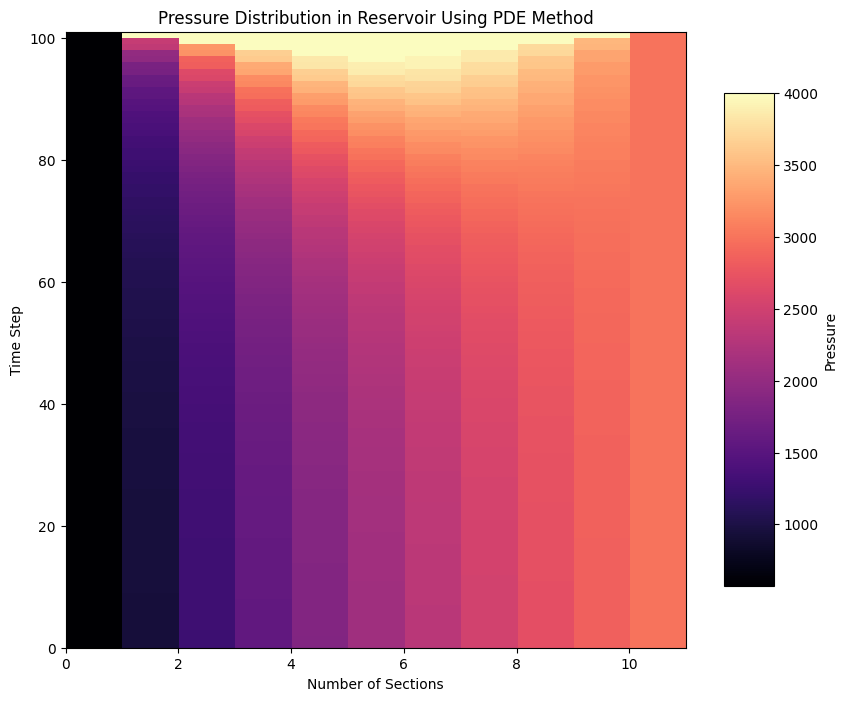

In [27]:
import numpy as np
import matplotlib.pyplot as plt

data = Result

# Plot using imshow for 2D visualization
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(data, cmap='magma', aspect='auto', extent=[0, data.shape[1], 0, data.shape[0]])

# Add color bar
cbar = fig.colorbar(img, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Pressure')

# Customize the plot
ax.set_xlabel('Number of Sections')
ax.set_ylabel('Time Step')
ax.set_title('Pressure Distribution in Reservoir Using PDE Method')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Pressure Distribution in Reservoir Using PDE Method')

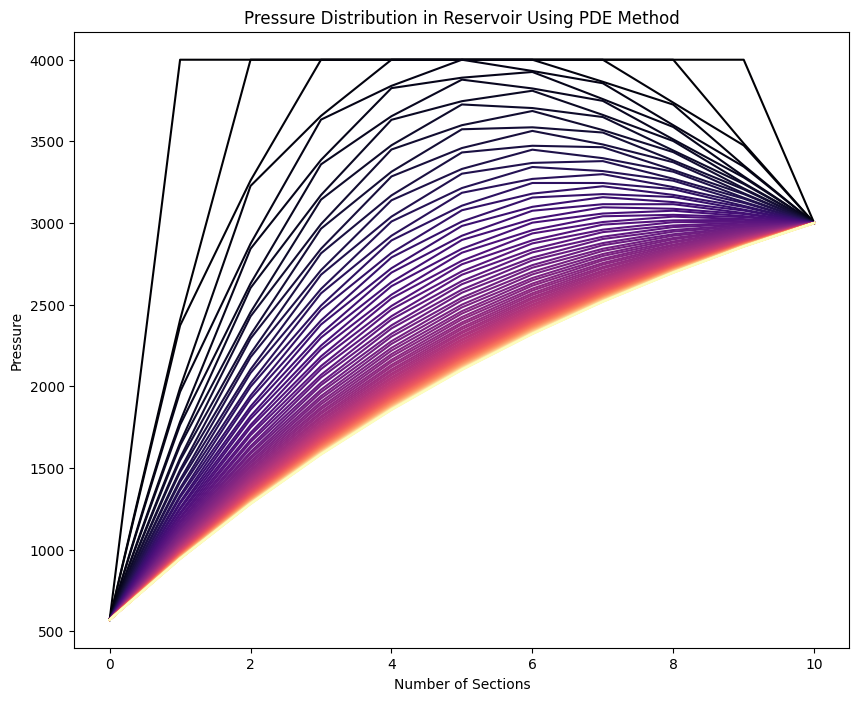

In [28]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

data = Pressure
# Plot using plot for 1D visualization
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(0, num_time_steps+1):
    color = plt.cm.magma(i/num_time_steps)
    ax.plot(data[i], color= color)

ax.set_xlabel('Number of Sections')
ax.set_ylabel('Pressure')
ax.set_title('Pressure Distribution in Reservoir Using PDE Method')